In [1]:
import bilby
import math
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# # Plot formatting
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# fontsize = 9
# params = {
#    'axes.labelsize': fontsize,
#    'font.size': fontsize,
#    'legend.fontsize': 8,
#    'xtick.labelsize': fontsize,
#    'ytick.labelsize': fontsize,
#    'axes.titlesize': fontsize,
#    'lines.linewidth': 1,  
#    'xtick.direction': 'in',
#    'ytick.direction': 'in',
#    'font.family': 'Serif',
#    'font.serif': 'Hoefler Text',
#    'axes.grid': True,
#    'figure.figsize': (4, 4),
#    'figure.dpi': 250,
#    'mathtext.fontset': 'cm'
# }

# for param in params.keys():
#     matplotlib.rcParams[param] = params[param]  

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fontsize = 18
# ALWAYS USE figsize = (3.375, X) for column plots 
# figsize = (6.75, X) for rows 
params = {
   'axes.labelsize': fontsize,
   'font.size': fontsize,
   'legend.fontsize': 12,
   'xtick.labelsize': fontsize,
   'ytick.labelsize': fontsize,
   'axes.titlesize':fontsize,
   'lines.linewidth':1,  
   'xtick.direction':'in',
   'ytick.direction':'in',
   'font.family':'Serif',
   'font.serif':'Hoefler Text',
   'axes.grid':True,
   'figure.figsize': (6.75, 4),
   'figure.dpi':250,
   'mathtext.fontset':'cm'
}

for param in params.keys():
    matplotlib.rcParams[param] = params[param]    

/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_23605/879564748.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


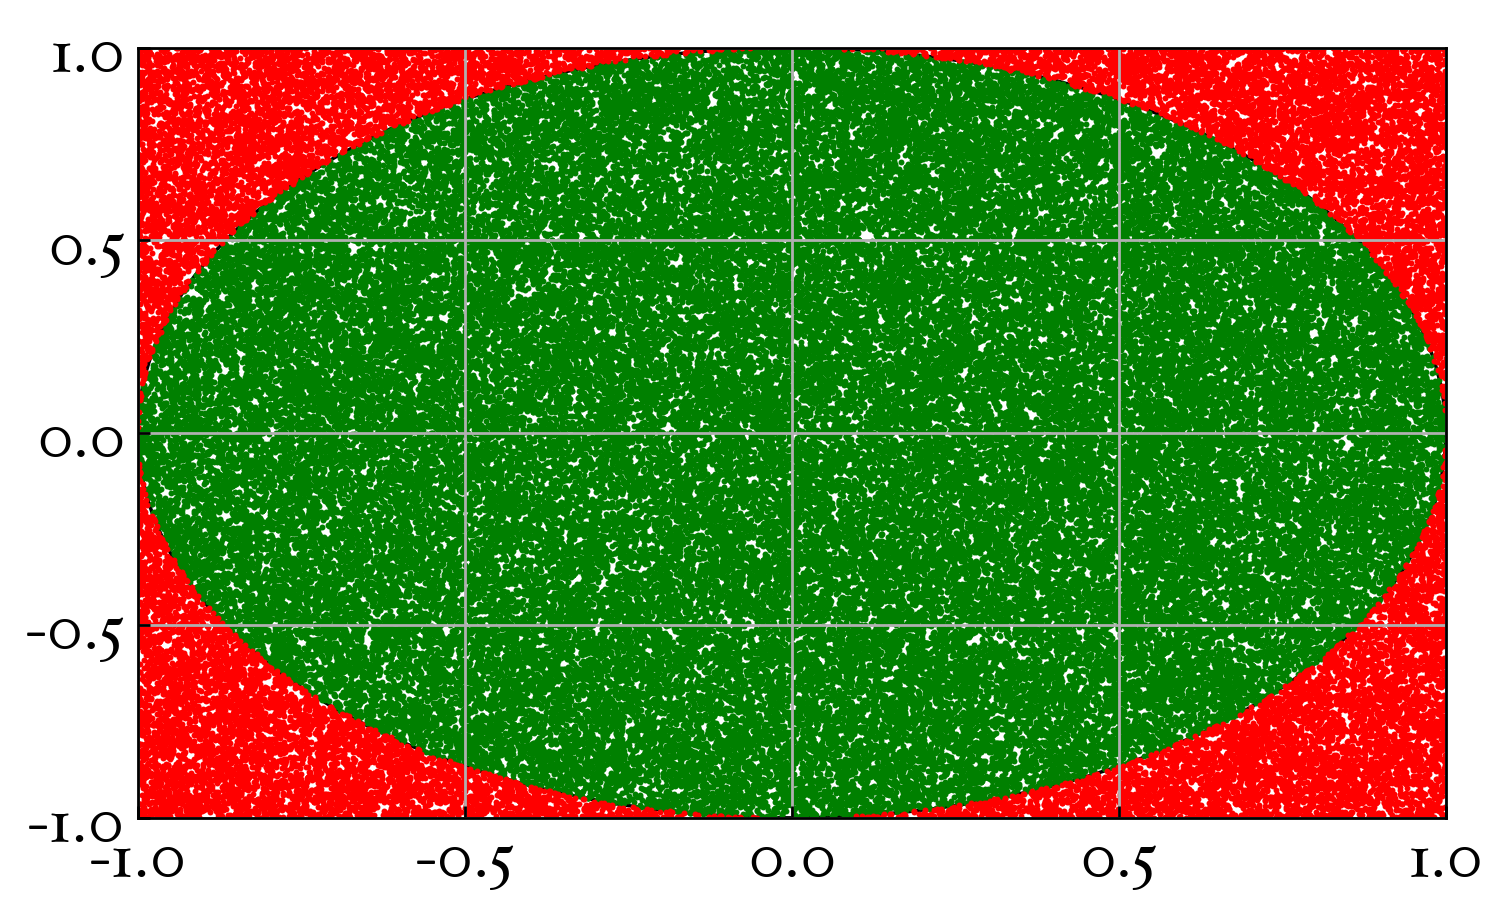

In [4]:
mu = 0
sigma = 0.25
xs = []
ys = []
xns = []
yns = []
rs = []
numPoints = 100000
for i in range(numPoints):
    x = 2*random.random()-1
    y = 2*random.random()-1
    if(np.sqrt(x**2+y**2) <= 1):
        xs.append(x)
        ys.append(y)
    else:
        xns.append(x)
        yns.append(y)
    rs.append(np.sqrt(x**2+y**2))

%matplotlib inline
fig, ax = plt.subplots()
# xx = np.linspace(-1, 1, 1000)
# yy = (1/(sigma*np.sqrt(2*math.pi)))*np.exp(-(1/2)*((xx-mu)/sigma)**2)
circle = plt.Circle((0, 0), 1, fill=False)
# ax.plot(xx, yy)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.add_artist(circle)
ax.scatter(xs, ys, s=0.5, color='g')
ax.scatter(xns, yns, s=0.5, color='r')
# ax.set_title('Anti-Aligned Tilt Angle')
# ax.set_xlabel(r'cos($\theta$)')
# ax.set_ylabel(r'$p$(cos($\theta$))')
fig.show()

In [5]:
P = (len(ys)/numPoints)*4
print(P)

3.14692


In [6]:
(sum(rs))/numPoints

0.764851993962104

In [7]:
# Mass Parameters
BBH_min = 5 # minimum BBH mass
BBH_max = 44 # maximum BBH mass

In [8]:
class MassPrior(bilby.core.prior.Prior):
    def __init__(self, minimum, maximum, **kwargs):
        self.minimum = minimum
        self.maximum = maximum
        super(MassPrior, self).__init__(minimum=minimum, maximum=maximum, **kwargs)

    def prob(self, m1):
        alpha = -2.3
        
        pm1 = m1**(alpha)
        return pm1
        
    def _get_m1_arrays(self):
        m1s = np.linspace(self.minimum, self.maximum, 1000)
        pchis = self.prob(m1s)
        return m1s, pchis

    def sample(self, size):
        m1s, pm1s = self._get_m1_arrays()
        max_pm1 = np.max(pm1s)
        total = 0
        samples = []
        a = []
        b = []
        c = []
        d = []
        while total < size:
            m1Index = random.randint(0,999)
            m1 = m1s[m1Index]
            pm1 = random.random()*max_pm1
            if(pm1 < pm1s[m1Index]):
                samples.append(m1)
                total = total + 1
                a.append(m1)
                b.append(pm1)
            else:
                c.append(m1)
                d.append(pm1)
        fig, ax = plt.subplots()
        ax.scatter(a, b, s=0.5, color='g')
        ax.scatter(c, d, s=0.5, color='r')
        ax.plot(m1s, pm1s, color='b')
        # ax.set_title(r'Rejection Sampling for $\chi$ (N = 10000)')
        ax.set_xlim(BBH_min, BBH_max)
        ax.set_ylim(0, max(pm1s))
        ax.set_xlabel(r'$m_1$')
        ax.set_ylabel(r'$p(m_1)$')
        return np.array(samples)

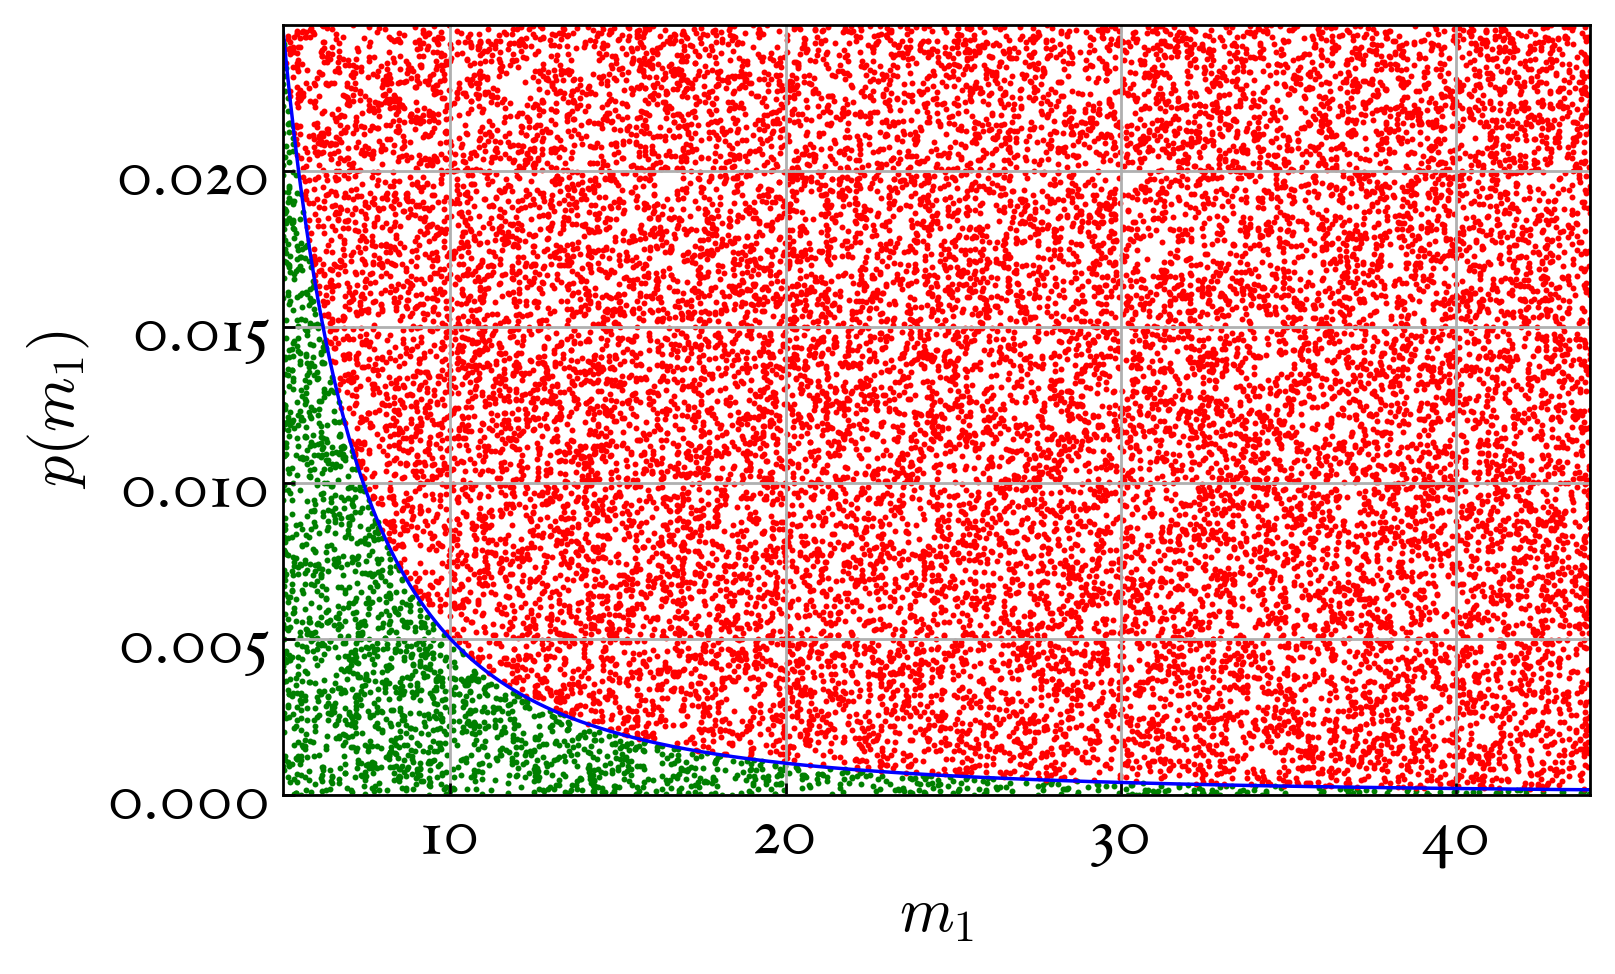

In [9]:
test = MassPrior(minimum=BBH_min, maximum=BBH_max, name='m1')
samples = test.sample(2000)
m1s, pm1s = test._get_m1_arrays()